In [136]:
from abc import ABC, abstractmethod
import csv
from typing import Tuple
from scipy import stats
import pandas as pnd
import numpy as np
import math
import matplotlib.pyplot as plt


In [137]:
# Part 1 - Reading Dataset
with open("Airplane.csv") as path:
    csv_reader = csv.reader(path)
    Headers=next(csv_reader)
    Headers=Headers[2:]
DataFrame = pnd.read_csv(r"Airplane.csv")
DataFrame = DataFrame.iloc[:, 2:]
DataFrame = DataFrame.replace([np.inf, -np.inf], np.nan).fillna(0)
# print(DataFrame)

In [138]:
from IPython.display import display

display(DataFrame.head())
print("Count of Rows: ", len(DataFrame))

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Count of Rows:  103904


In [139]:
# Part 2 - Confidence

from sklearn.model_selection import train_test_split

# Selecting a category to work sample based on it
categories = DataFrame['Type of Travel'].unique()

# Selecting 10% of the whole population
sampled_data = pnd.DataFrame()
for category in categories:
    category_data = DataFrame[DataFrame['Type of Travel'] == category]
    train_set, test_set = train_test_split(category_data, test_size=0.1, random_state=42)
    sampled_data = pnd.concat([sampled_data, test_set])

display(sampled_data.head())
print("Count of Rows: ", len(sampled_data))

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
102950,Female,Loyal Customer,22,Personal Travel,Eco Plus,262,1,5,1,1,...,1,3,2,1,1,5,1,0,0.0,neutral or dissatisfied
18599,Female,Loyal Customer,16,Personal Travel,Eco,153,3,4,3,3,...,5,3,2,5,4,5,5,33,33.0,neutral or dissatisfied
66746,Male,Loyal Customer,10,Personal Travel,Eco,1009,3,4,3,2,...,1,1,4,1,2,2,1,10,0.0,neutral or dissatisfied
94323,Male,Loyal Customer,32,Personal Travel,Eco Plus,1482,1,5,1,3,...,3,5,4,5,4,4,3,58,56.0,neutral or dissatisfied
65897,Female,Loyal Customer,24,Personal Travel,Eco,874,3,0,4,4,...,3,3,5,4,2,4,3,0,0.0,neutral or dissatisfied


Count of Rows:  10391


In [140]:
# Part 3

DataFrame = sampled_data.replace(
    {
        "Gender": {"Male": 0, "Female": 1},
        "Customer Type": {"disloyal Customer": 1, "Loyal Customer": 0},
        "Type of Travel": {"Personal Travel": 0, "Business travel": 1},
        "Class": {"Eco": 0, "Eco Plus": 1, "Business": 2},
        "satisfaction": {"neutral or dissatisfied": 0, "satisfied": 1},
    }
)
DataFrame = DataFrame.astype(int)
DataFrame["Age"] = pnd.cut(DataFrame["Age"], bins=6, labels=False)
DataFrame["Flight Distance"] = pnd.cut(DataFrame["Flight Distance"], bins=6, labels=False)
DataFrame["Departure Delay in Minutes"] = pnd.cut(DataFrame["Departure Delay in Minutes"], bins=6, labels=False)
DataFrame["Arrival Delay in Minutes"] = pnd.cut(DataFrame["Arrival Delay in Minutes"], bins=6, labels=False)

display(DataFrame)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
102950,1,0,1,0,1,0,1,5,1,1,...,1,3,2,1,1,5,1,0,0,0
18599,1,0,0,0,0,0,3,4,3,3,...,5,3,2,5,4,5,5,0,0,0
66746,0,0,0,0,0,1,3,4,3,2,...,1,1,4,1,2,2,1,0,0,0
94323,0,0,1,0,1,1,1,5,1,3,...,3,5,4,5,4,4,3,0,0,0
65897,1,0,1,0,0,1,3,0,4,4,...,3,3,5,4,2,4,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22574,0,0,3,1,2,2,5,5,5,5,...,4,4,4,4,3,4,5,0,0,1
38236,0,0,3,1,2,0,1,1,1,1,...,5,5,5,4,3,5,5,0,0,1
35193,0,1,2,1,0,1,3,3,3,4,...,4,1,2,5,4,3,4,0,0,0
76124,0,0,2,1,2,2,5,5,5,5,...,5,5,5,5,4,5,5,0,0,1


In [141]:
# Part 4 - Training

# Preparing Data for Train and Test
X = DataFrame.iloc[:, :-1]
Y = DataFrame["satisfaction"]

X_Test = X.iloc[:2000, :]
Y_Test = Y.iloc[:2000]

Train = DataFrame.iloc[2000:, :]
Train_X_0 = Train[Train["satisfaction"] == 0].iloc[:, :-1]
Train_Y_0 = Train[Train["satisfaction"] == 0].iloc[:, -1]
Train_X_1 = Train[Train["satisfaction"] == 1].iloc[:, :-1]
Train_Y_1 = Train[Train["satisfaction"] == 1].iloc[:, -1]

idx0 = np.random.choice([i for i in range(Train_Y_0.shape[0])], size=4000, replace=False)
idx1 = np.random.choice([i for i in range(Train_Y_1.shape[0])], size=4000, replace=False)

X_Train0 = X.iloc[idx0, :]
Y_Train0 = Y.iloc[idx0]
X_Train1 = X.iloc[idx1, :]
Y_Train1 = Y.iloc[idx1]

X_Train = np.concatenate((X_Train0, X_Train1))
Y_Train = np.concatenate((Y_Train0, Y_Train1))


In [142]:
# Desicion Tree

class Node:
    def __init__(self):
        self.gini = None
        self.entropy = None
        self.informationGain = None
        self.__split = None
        self.__feature = None
        self.left = None
        self.right = None
        self.leaf_value = None

    def set_params(self, split: float, feature: int):
        self.__split = split
        self.__feature = feature

    def get_params(self) -> Tuple[float, int]:
        return (self.__split, self.__feature)

    def set_children(self, left, right):
        self.left = left
        self.right = right

    def get_left_node(self):
        return self.left

    def get_right_node(self):
        return self.right


class DecisionTree(ABC):
    def __init__(
        self, max_depth: int = None, min_samples_split: int = 2, metric: str = "gini"
    ):
        self.tree = None
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.metric = metric

    @abstractmethod
    def _impurity(self, D: np.array):
        pass

    @abstractmethod
    def _leaf_value(self, D: np.array):
        pass

    def __grow(self, node: Node, D: np.array, level: int):
        depth = (self.max_depth is None) or (self.max_depth >= (level + 1))
        msamp = self.min_samples_split <= D.shape[0]
        n_cls = np.unique(D[:, -1]).shape[0] != 1

        if depth and msamp and n_cls:
            ip_node = None
            feature = None
            split = None
            left_D = None
            right_D = None
            for f in range(D.shape[1] - 1):
                for s in np.unique(D[:, f]):
                    D_l = D[D[:, f] <= s]
                    D_r = D[D[:, f] > s]
                    if D_l.size and D_r.size:
                        ip = (D_l.shape[0] / D.shape[0]) * self._impurity(D_l) + (
                            D_r.shape[0] / D.shape[0]) * self._impurity(D_r)
                        if self.metric == "gini":
                            node.gini = ip
                        if self.metric == "entropy":
                            node.entropy = ip
                            ip = self._impurity(D) - ip
                            node.informationGain = ip

                        if ((ip_node is None)
                            or (self.metric == "gini" and ip < ip_node)
                            or (self.metric == "entropy" and ip > ip_node)):
                                ip_node = ip
                                feature = f
                                split = s
                                left_D = D_l
                                right_D = D_r
            node.set_params(split, feature)
            left_node = Node()
            right_node = Node()
            node.set_children(left_node, right_node)
            self.__grow(node.get_left_node(), left_D, level + 1)
            self.__grow(node.get_right_node(), right_D, level + 1)
        else:
            node.leaf_value = self._leaf_value(D)
            return

    def __traverse(self, node: Node, Xrow: np.array):
        if node.leaf_value is None:
            (s, f) = node.get_params()
            if Xrow.iloc[f] <= s:
                return self.__traverse(node.get_left_node(), Xrow)
            else:
                return self.__traverse(node.get_right_node(), Xrow)
        else:
            return node.leaf_value

    def train(self, Xin: np.array, Yin: np.array):
        D = np.concatenate((Xin, Yin.reshape(-1, 1)), axis=1)
        self.tree = Node()
        self.__grow(self.tree, D, 1)

    def predict(self, Xin: np.array):
        p = []
        for r in range(Xin.shape[0]):
            p.append(self.__traverse(self.tree, Xin.iloc[r, :]))
        return np.array(p).flatten()

class DecisionTreeClassifier(DecisionTree):
    def __init__(
        self, max_depth: int = None, min_samples_split: int = 2, metric: str = "gini"
    ):
        DecisionTree.__init__(self, max_depth, min_samples_split, metric)

    def __gini(self, D: np.array):
        G = 0
        for c in np.unique(D[:, -1]):
            p = D[D[:, -1] == c].shape[0] / D.shape[0]
            G += p * (1 - p)
        return G

    def __entropy(self, D: np.array):
        E = 0
        for c in np.unique(D[:, -1]):
            p = D[D[:, -1] == c].shape[0] / D.shape[0]
            E -= p * np.log2(p)
        return E

    def _impurity(self, D: np.array):
        ip = None
        if self.metric == "gini":
            ip = self.__gini(D)
        elif self.metric == "entropy":
            ip = self.__entropy(D)
        return ip

    def _leaf_value(self, D: np.array):
        return stats.mode(D[:, -1], keepdims=False)[0]


def DrawTree(Headers, node: Node,i:int):
    if node.leaf_value == None:
        for j in range(i):
            print("    ", end = "")
        (s,f)=node.get_params()
        print(f"feature : {Headers[f]} split value : {s}")
        for j in range(i):
            print("    ", end = "")
        if node.gini==None:
            print(f"entropy : {node.entropy} information gain: {node.informationGain}")
        else:
            print(f"gini : {node.gini}")
        DrawTree(Headers,node.left,i+1)
        DrawTree(Headers,node.right,i+1)

In [143]:
clf_entropy = DecisionTreeClassifier(max_depth=10, metric="entropy")
clf_entropy.train(X_Train, Y_Train)
yp = clf_entropy.predict(X_Test)
result = []
for label in Y_Test:
    result.append(label)

In [144]:
# Part 5 - Accuracy

TP, TN, FP, FN, accuracy, precision, recall = 0, 0, 0, 0, 0, 0, 0
accuracyList = []
true = 0
total = 0
for i in range(X_Test.shape[0]):
    if result[i] == 1 and yp[i] == 1:
        TP += 1
        true += 1
    if result[i] == 0 and yp[i] == 0:
        TN += 1
        true += 1
    if result[i] == 0 and yp[i] == 1:
        FP += 1
    if result[i] == 1 and yp[i] == 0:
        FN += 1
    total += 1
    accuracyList.append(true/total)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("accuracy: %.2f" % accuracy)
print("precision: %.2f" % precision)
print("recall: %.2f" % recall)


accuracy: 0.97
precision: 0.98
recall: 0.70


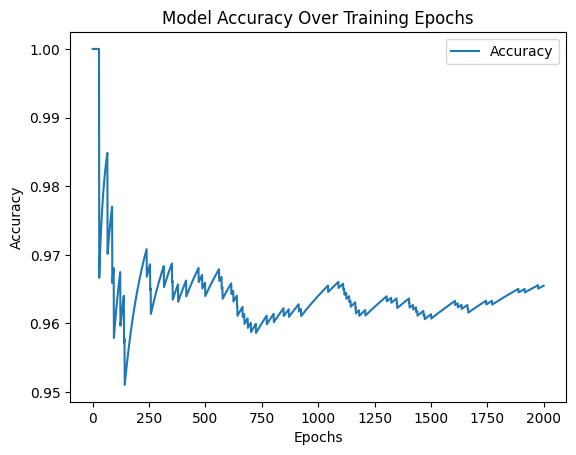

In [145]:
epochs = range(1, 11)  # assuming you have 10 epochs, adjust accordingly

plt.plot(accuracyList, label='Accuracy')
plt.title('Model Accuracy Over Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()